<div align = "center">

# **Exploración de Datos**

</div>

## Librerías

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [91]:
data = pd.read_csv("../data/input/input.csv")

## Verificación de valores nulos

In [92]:
# Verificar valores nulos en el dataset
valores_nulos = data.isnull().sum()
total_nulos = valores_nulos.sum()

print("="*60)
print("VERIFICACIÓN DE VALORES NULOS")
print("="*60)
print(f"\nTotal de valores nulos en el dataset: {total_nulos}")

if total_nulos > 0:
    print("\nColumnas con valores nulos:")
    print(valores_nulos[valores_nulos > 0])
else:
    print("\n✓ No hay valores nulos en el dataset")
    
print(f"\nDimensiones del dataset: {data.shape[0]} filas × {data.shape[1]} columnas")

VERIFICACIÓN DE VALORES NULOS

Total de valores nulos en el dataset: 16008

Columnas con valores nulos:
Gastos_Adicionales_siniestros_num      2001
Gastos_Adicionales_siniestros_monto    2001
Gastos_Medicos_RC_siniestros_num       2001
Gastos_Medicos_RC_siniestros_monto     2001
Resp_Civil_siniestros_num              2001
Resp_Civil_siniestros_monto            2001
Contenidos_siniestros_num              2001
Contenidos_siniestros_monto            2001
dtype: int64

Dimensiones del dataset: 10000 filas × 20 columnas


Son los de test, vale monda

## Exploracion del dataframe

Columnas

In [ ]:
print(data.dtypes)

estudiante_id                            int64
nombre                                  object
año_cursado                             object
estudios_area                           object
calif_promedio                         float64
2_o_mas_inquilinos                      object
en_campus                               object
distancia_al_campus                    float64
genero                                  object
extintor_incendios                      object
clase_suscripcion                       object
retencion                               object
Gastos_Adicionales_siniestros_num      float64
Gastos_Adicionales_siniestros_monto    float64
Gastos_Medicos_RC_siniestros_num       float64
Gastos_Medicos_RC_siniestros_monto     float64
Resp_Civil_siniestros_num              float64
Resp_Civil_siniestros_monto            float64
Contenidos_siniestros_num              float64
Contenidos_siniestros_monto            float64
dtype: object


### Columnas categoricas

In [94]:
# Convertir columnas de siniestros a binarias
data['Gastos_Adicionales_siniestros_binario'] = (data['Gastos_Adicionales_siniestros_num'] > 0).astype(int)
data['Gastos_Medicos_RC_siniestros_binario'] = (data['Gastos_Medicos_RC_siniestros_num'] > 0).astype(int)
data['Resp_Civil_siniestros_binario'] = (data['Resp_Civil_siniestros_num'] > 0).astype(int)
data['Contenidos_siniestros_binario'] = (data['Contenidos_siniestros_num'] > 0).astype(int)

columnas_categoricas = ["año_cursado", "estudios_area", "2_o_mas_inquilinos", 
                "en_campus", "genero", "extintor_incendios",
                "clase_suscripcion", "retencion",
                "Gastos_Adicionales_siniestros_binario",
                "Gastos_Medicos_RC_siniestros_binario",
                "Resp_Civil_siniestros_binario",
                "Contenidos_siniestros_binario"]

In [95]:
# Explorar categorías de cada columna categórica - VERSIÓN CON TABLAS
print("="*80)
print("ANÁLISIS DE CATEGORÍAS POR COLUMNA")
print("="*80)

for columna in columnas_categoricas:
    print(f"\n📊 COLUMNA: {columna}")
    print("-" * 50)
    
    # Crear tabla con conteo y porcentajes
    conteo = data[columna].value_counts()
    porcentajes = data[columna].value_counts(normalize=True) * 100
    
    # Crear DataFrame para mostrar como tabla
    tabla_resumen = pd.DataFrame({
        'Categoría': conteo.index,
        'Conteo': conteo.values,
        'Porcentaje (%)': porcentajes.values.round(2)
    })
    
    print(f"Categorías únicas: {len(conteo)}")
    print(f"Valores nulos: {data[columna].isnull().sum()}")
    print("\n📋 DISTRIBUCIÓN:")
    print(tabla_resumen.to_string(index=False))
    
    print("\n" + "="*80)


ANÁLISIS DE CATEGORÍAS POR COLUMNA

📊 COLUMNA: año_cursado
--------------------------------------------------
Categorías únicas: 5
Valores nulos: 0

📋 DISTRIBUCIÓN:
Categoría  Conteo  Porcentaje (%)
  2do año    2277           22.77
  4to año    2253           22.53
  1er año    2235           22.35
  3er año    2209           22.09
 posgrado    1026           10.26


📊 COLUMNA: estudios_area
--------------------------------------------------
Categorías únicas: 4
Valores nulos: 0

📋 DISTRIBUCIÓN:
     Categoría  Conteo  Porcentaje (%)
Administracion    2585           25.85
          Otro    2483           24.83
      Ciencias    2473           24.73
   Humanidades    2459           24.59


📊 COLUMNA: 2_o_mas_inquilinos
--------------------------------------------------
Categorías únicas: 2
Valores nulos: 0

📋 DISTRIBUCIÓN:
Categoría  Conteo  Porcentaje (%)
       No    8035           80.35
       Si    1965           19.65


📊 COLUMNA: en_campus
----------------------------------------

### Columnas Numericas

In [96]:
columnas_numericas = ["calif_promedio", "distancia_al_campus",
                      "Gastos_Adicionales_siniestros_monto",
                      "Gastos_Medicos_RC_siniestros_monto",
                      "Resp_Civil_siniestros_monto",
                      "Contenidos_siniestros_monto"]

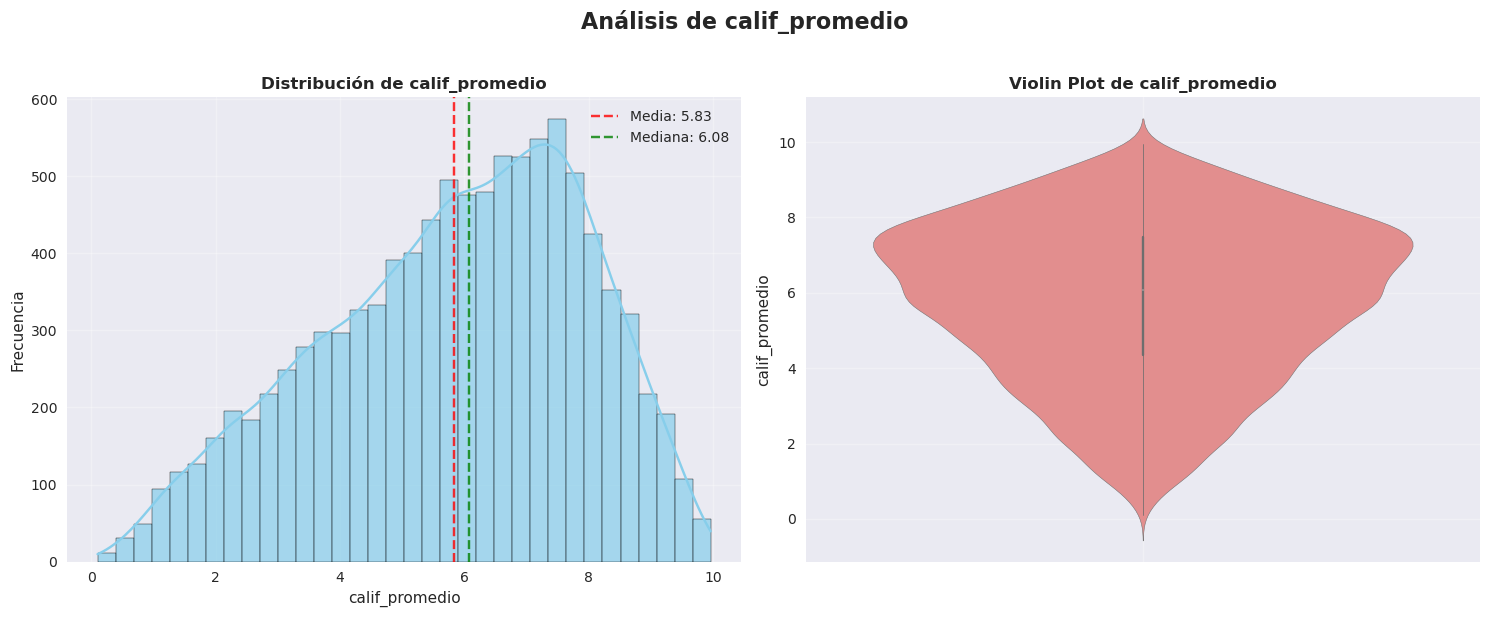


📊 Estadísticas de calif_promedio:
Media: 5.83
Mediana: 6.08
Desviación estándar: 2.11
Valores nulos: 0
--------------------------------------------------


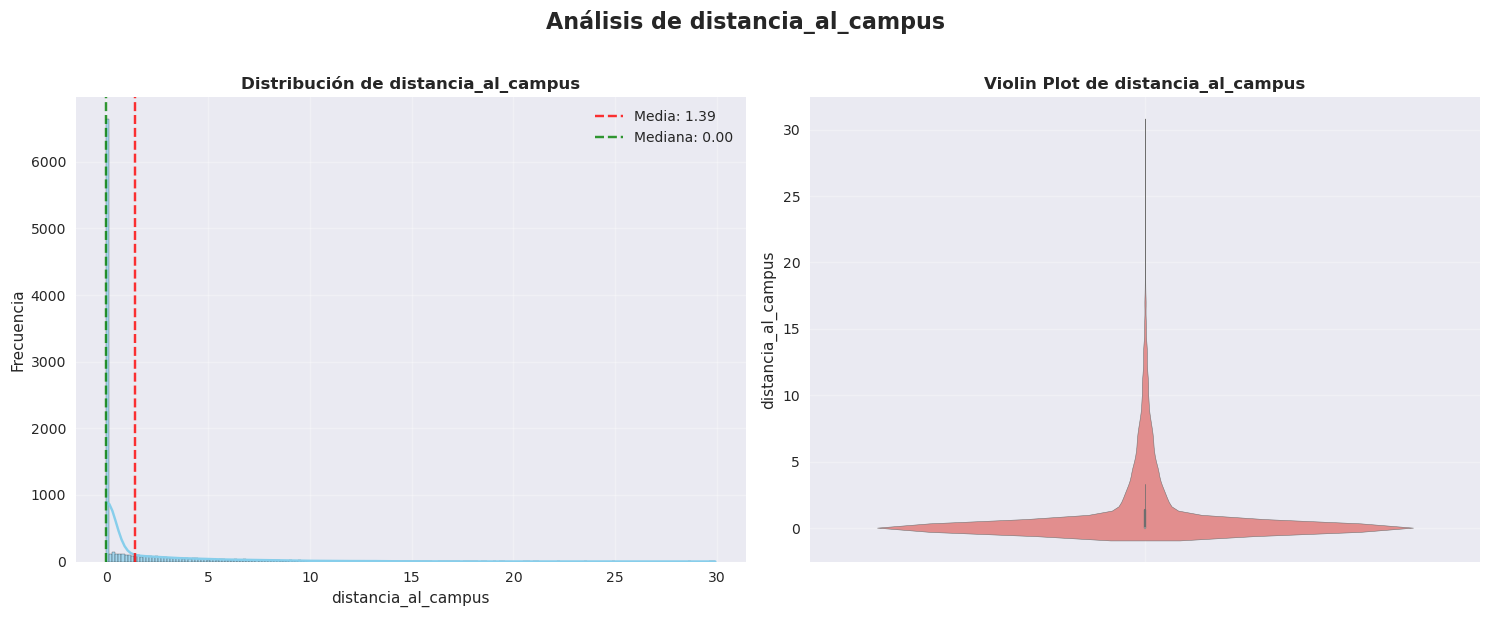


📊 Estadísticas de distancia_al_campus:
Media: 1.39
Mediana: 0.00
Desviación estándar: 2.95
Valores nulos: 0
--------------------------------------------------


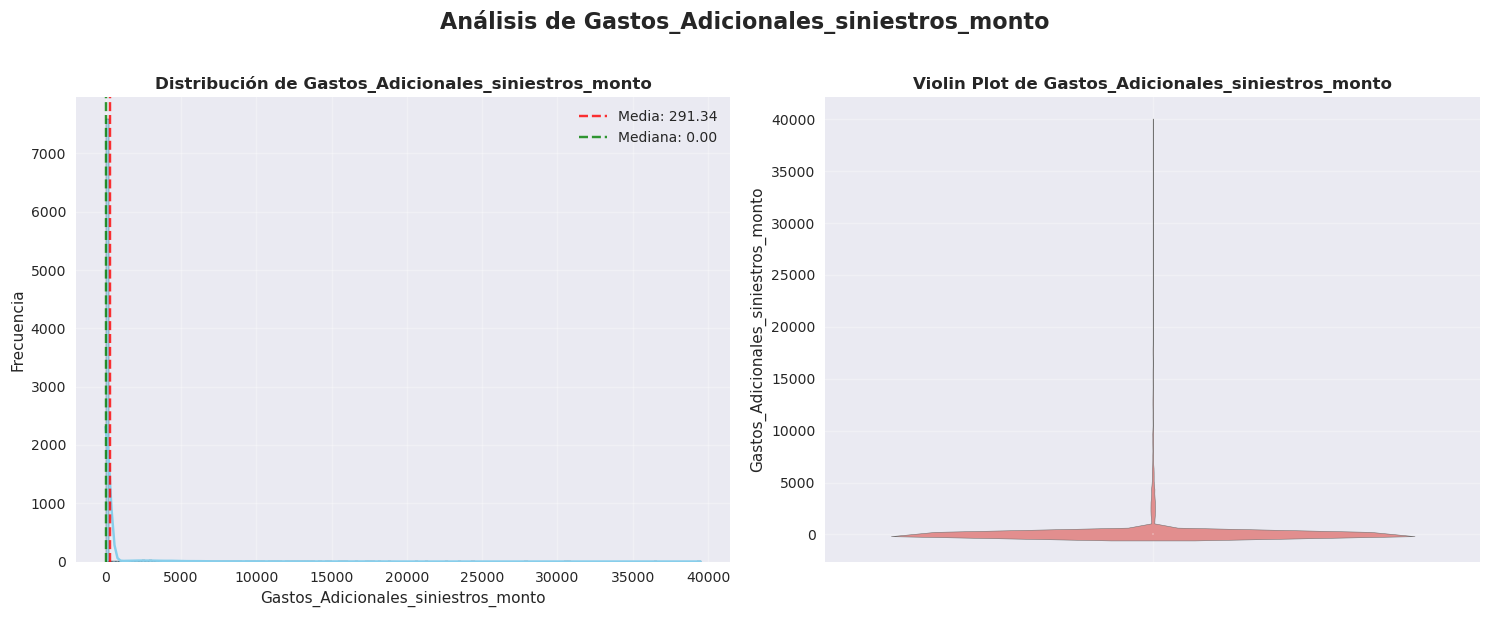


📊 Estadísticas de Gastos_Adicionales_siniestros_monto:
Media: 291.34
Mediana: 0.00
Desviación estándar: 1744.47
Valores nulos: 2001
--------------------------------------------------


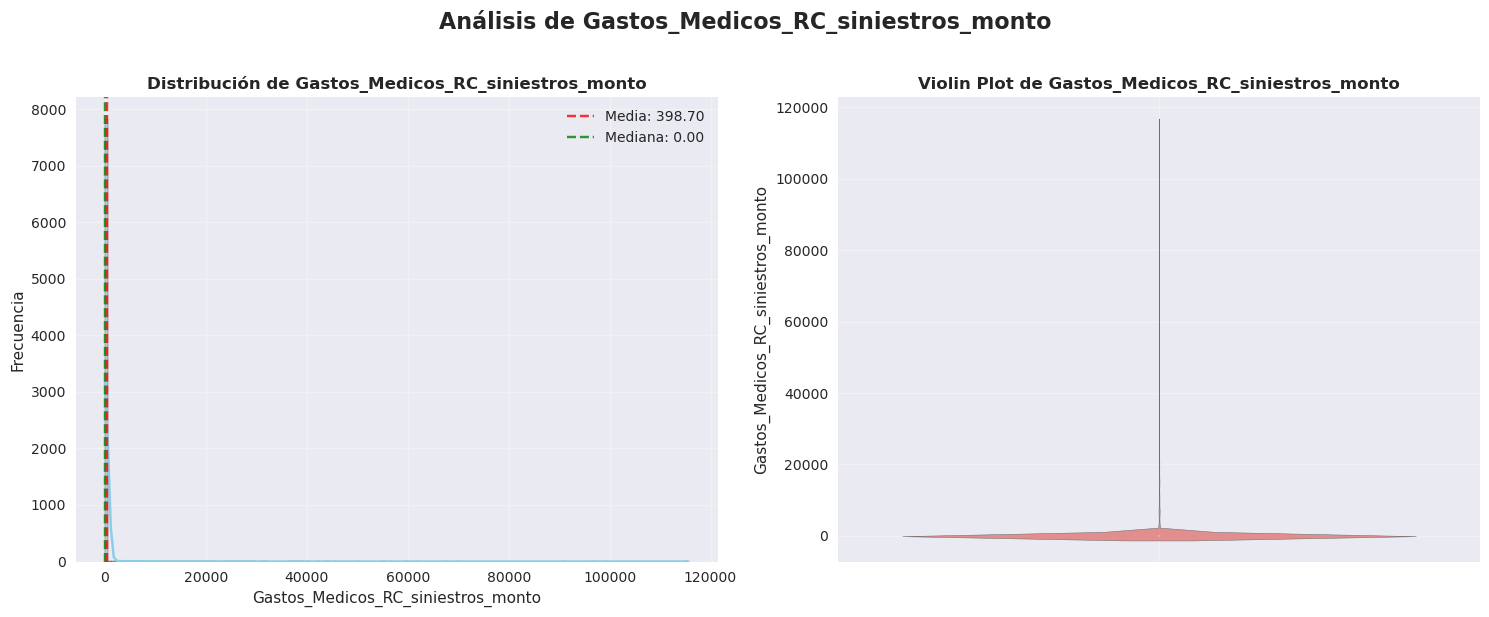


📊 Estadísticas de Gastos_Medicos_RC_siniestros_monto:
Media: 398.70
Mediana: 0.00
Desviación estándar: 3837.09
Valores nulos: 2001
--------------------------------------------------


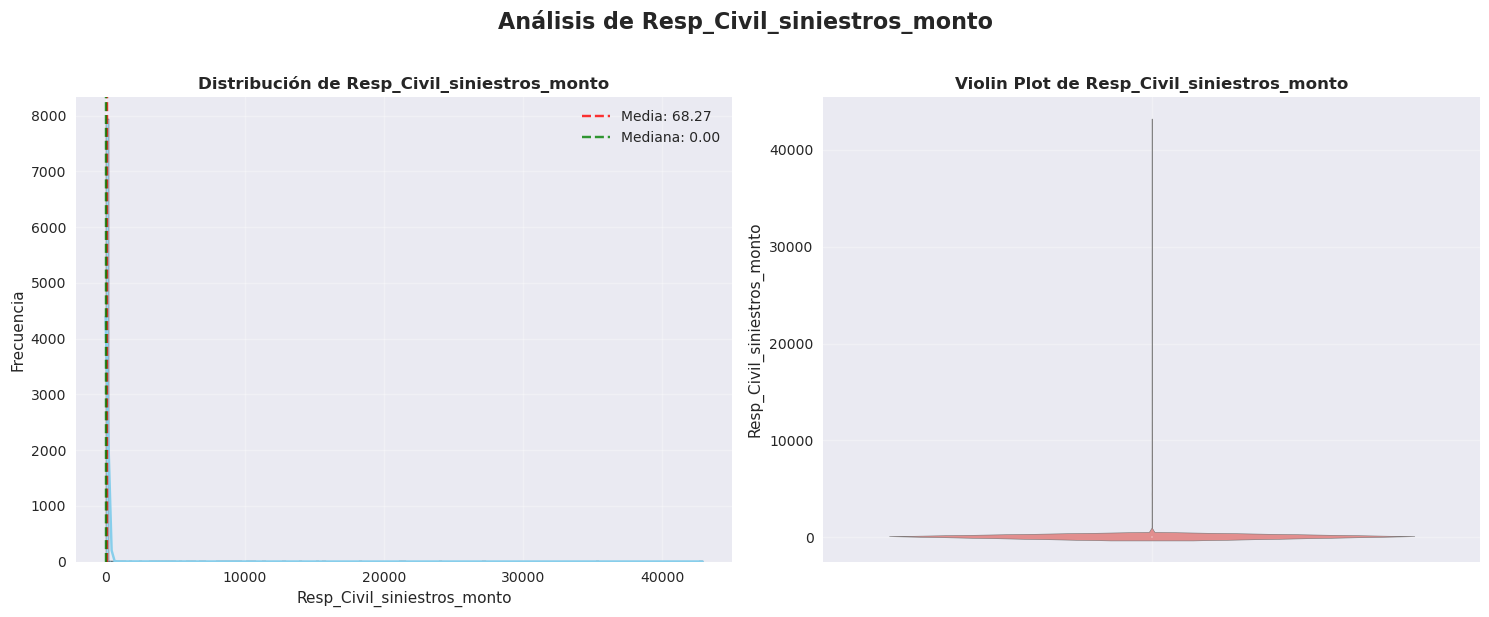


📊 Estadísticas de Resp_Civil_siniestros_monto:
Media: 68.27
Mediana: 0.00
Desviación estándar: 1043.15
Valores nulos: 2001
--------------------------------------------------


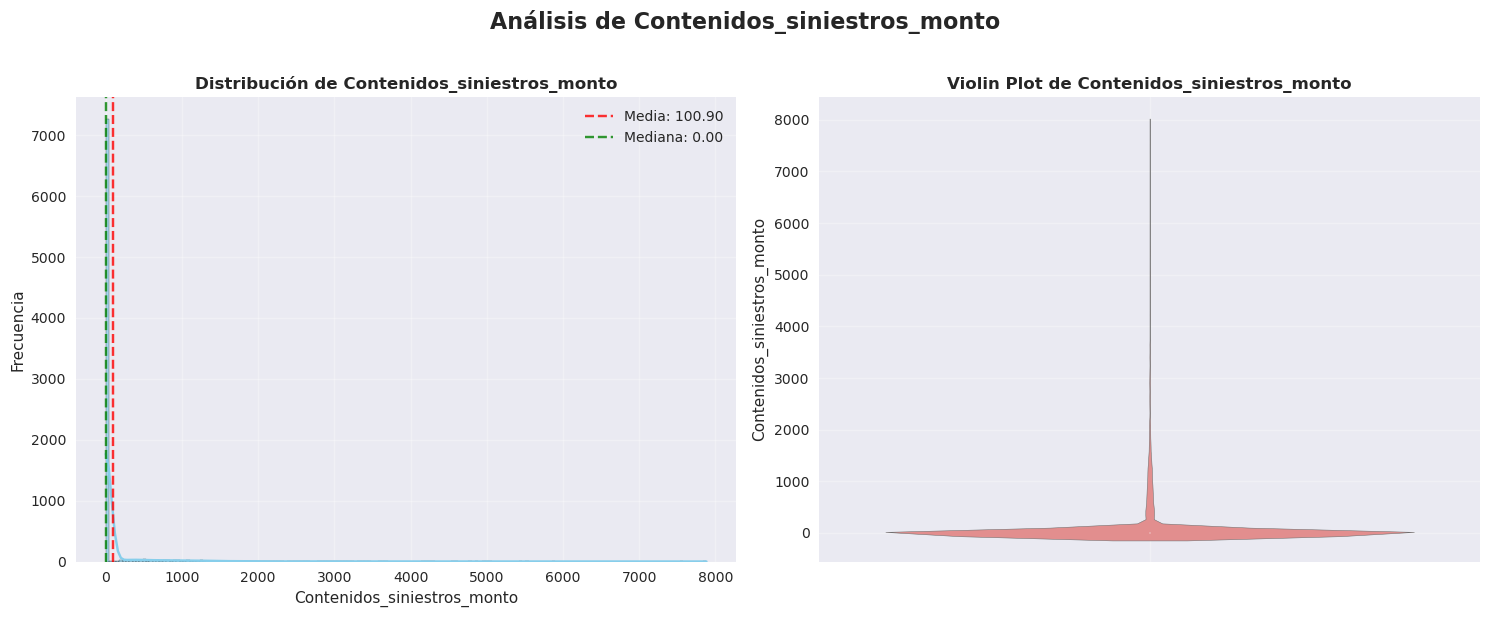


📊 Estadísticas de Contenidos_siniestros_monto:
Media: 100.90
Mediana: 0.00
Desviación estándar: 435.65
Valores nulos: 2001
--------------------------------------------------


In [97]:
# Configurar estilo de seaborn
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Crear gráficas para cada columna numérica
for i, columna in enumerate(columnas_numericas):
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(f'Análisis de {columna}', fontsize=16, fontweight='bold', y=1.02)
    
    # Histograma con densidad
    sns.histplot(data=data, x=columna, kde=True, ax=axes[0], alpha=0.7, color='skyblue')
    axes[0].set_title(f'Distribución de {columna}', fontweight='bold')
    axes[0].set_xlabel(columna)
    axes[0].set_ylabel('Frecuencia')
    axes[0].grid(True, alpha=0.3)
    
    # Violin plot
    sns.violinplot(data=data, y=columna, ax=axes[1], color='lightcoral')
    axes[1].set_title(f'Violin Plot de {columna}', fontweight='bold')
    axes[1].set_ylabel(columna)
    axes[1].grid(True, alpha=0.3)
    
    # Estadísticas en el gráfico
    media = data[columna].mean()
    mediana = data[columna].median()
    axes[0].axvline(media, color='red', linestyle='--', alpha=0.8, label=f'Media: {media:.2f}')
    axes[0].axvline(mediana, color='green', linestyle='--', alpha=0.8, label=f'Mediana: {mediana:.2f}')
    axes[0].legend()
    
    plt.tight_layout()
    plt.show()
    
    # Mostrar estadísticas básicas
    print(f"\n📊 Estadísticas de {columna}:")
    print(f"Media: {data[columna].mean():.2f}")
    print(f"Mediana: {data[columna].median():.2f}")
    print(f"Desviación estándar: {data[columna].std():.2f}")
    print(f"Valores nulos: {data[columna].isnull().sum()}")
    print("-" * 50)

/tmp/ipykernel_100843/513102498.py:21: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/riemannintegrable/anaconda3/envs/competencia_cas_python/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


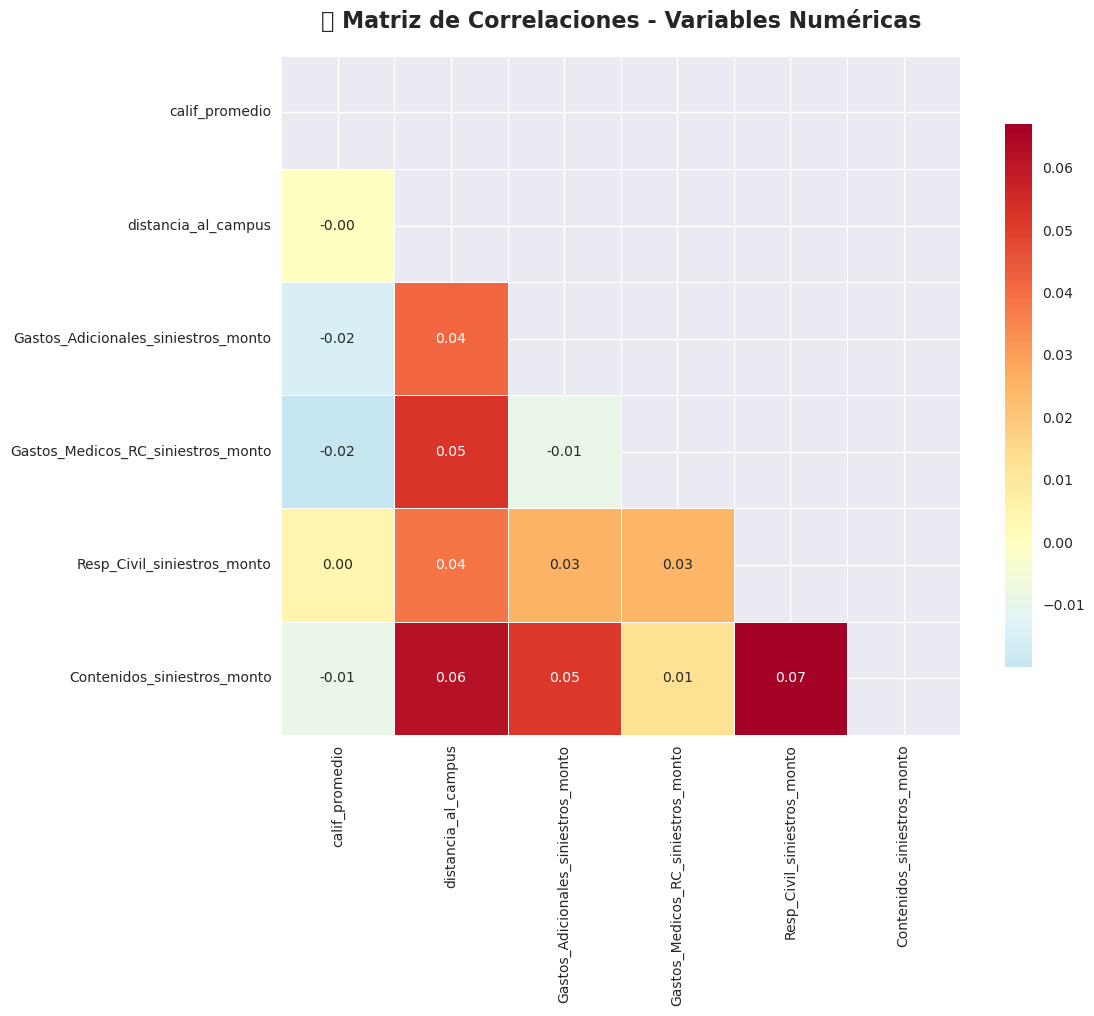


🔍 ANÁLISIS DE CORRELACIONES:
No se encontraron correlaciones fuertes (|r| > 0.7)

📈 Estadísticas de correlación:
Correlación promedio: 0.022
Correlación máxima: 0.067
Correlación mínima: -0.020


In [98]:
# Calcular matriz de correlaciones
correlation_matrix = data[columnas_numericas].corr()

# Crear heatmap con seaborn
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Máscara para mostrar solo la mitad

# Crear el heatmap
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdYlBu_r', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8},
            linewidths=0.5)

plt.title('🔥 Matriz de Correlaciones - Variables Numéricas', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Análisis de correlaciones fuertes
print("\n🔍 ANÁLISIS DE CORRELACIONES:")
print("="*50)

# Encontrar correlaciones fuertes (|r| > 0.7)
correlaciones_fuertes = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            correlaciones_fuertes.append({
                'Variable 1': correlation_matrix.columns[i],
                'Variable 2': correlation_matrix.columns[j],
                'Correlación': corr_val
            })

if correlaciones_fuertes:
    print("Correlaciones fuertes (|r| > 0.7):")
    for corr in correlaciones_fuertes:
        print(f"{corr['Variable 1']} ↔ {corr['Variable 2']}: {corr['Correlación']:.3f}")
else:
    print("No se encontraron correlaciones fuertes (|r| > 0.7)")

# Estadísticas de la matriz de correlación
print(f"\n📈 Estadísticas de correlación:")
print(f"Correlación promedio: {correlation_matrix.values[np.triu_indices_from(correlation_matrix.values, k=1)].mean():.3f}")
print(f"Correlación máxima: {correlation_matrix.values[np.triu_indices_from(correlation_matrix.values, k=1)].max():.3f}")
print(f"Correlación mínima: {correlation_matrix.values[np.triu_indices_from(correlation_matrix.values, k=1)].min():.3f}")

In [99]:
# Resumen básico del dataset
print("="*60)
print("📊 RESUMEN DEL DATASET")
print("="*60)

print(f"\nTotal de pólizas: {len(data):,}")
print(f"División del dataset:")
print(f"  - Entrenamiento: {(data['retencion'] == 'entrenamiento').sum():,} ({(data['retencion'] == 'entrenamiento').mean()*100:.1f}%)")
print(f"  - Validación: {(data['retencion'] == 'validacion').sum():,} ({(data['retencion'] == 'validacion').mean()*100:.1f}%)")

# Variable objetivo: pérdida total
data['perdida_total'] = (data['Contenidos_siniestros_monto'] + 
                         data['Gastos_Adicionales_siniestros_monto'] + 
                         data['Resp_Civil_siniestros_monto'] + 
                         data['Gastos_Medicos_RC_siniestros_monto'])

print(f"\n📈 VARIABLE OBJETIVO - Pérdida Total:")
print(f"  - Media: ${data['perdida_total'].mean():,.2f}")
print(f"  - Mediana: ${data['perdida_total'].median():,.2f}")
print(f"  - Máxima: ${data['perdida_total'].max():,.2f}")
print(f"  - % con siniestros: {(data['perdida_total'] > 0).mean()*100:.1f}%")

📊 RESUMEN DEL DATASET

Total de pólizas: 10,000
División del dataset:
  - Entrenamiento: 7,999 (80.0%)
  - Validación: 2,001 (20.0%)

📈 VARIABLE OBJETIVO - Pérdida Total:
  - Media: $859.20
  - Mediana: $0.00
  - Máxima: $115,617.30
  - % con siniestros: 13.2%


### 2. Análisis de Frecuencia y Severidad

In [100]:
# Análisis de Frecuencia y Severidad por Cobertura
print("="*60)
print("📈 FRECUENCIA Y SEVERIDAD POR COBERTURA")
print("="*60)

coberturas = ['Contenidos', 'Gastos_Adicionales', 'Resp_Civil', 'Gastos_Medicos_RC']

for cobertura in coberturas:
    col_num = f'{cobertura}_siniestros_num'
    col_monto = f'{cobertura}_siniestros_monto'
    
    # Frecuencia
    n_con_siniestro = (data[col_num] > 0).sum()
    freq = n_con_siniestro / len(data)
    
    # Severidad (promedio cuando hay siniestro)
    severidad = data.loc[data[col_num] > 0, col_monto].mean() if n_con_siniestro > 0 else 0
    
    # Prima pura
    prima_pura = data[col_monto].mean()
    
    print(f"\n{cobertura}:")
    print(f"  Frecuencia: {freq*100:.2f}% ({n_con_siniestro:,} pólizas)")
    print(f"  Severidad media: ${severidad:,.2f}")
    print(f"  Prima pura: ${prima_pura:,.2f}")

📈 FRECUENCIA Y SEVERIDAD POR COBERTURA

Contenidos:
  Frecuencia: 7.43% (743 pólizas)
  Severidad media: $1,086.25
  Prima pura: $100.90

Gastos_Adicionales:
  Frecuencia: 4.16% (416 pólizas)
  Severidad media: $5,601.91
  Prima pura: $291.34

Resp_Civil:
  Frecuencia: 0.67% (67 pólizas)
  Severidad media: $8,150.88
  Prima pura: $68.27

Gastos_Medicos_RC:
  Frecuencia: 1.83% (183 pólizas)
  Severidad media: $17,427.24
  Prima pura: $398.70


### 3. Análisis de Factores de Riesgo Clave

In [101]:
# Análisis de principales factores de riesgo
print("="*60)
print("🎯 FACTORES DE RIESGO PRINCIPALES")
print("="*60)

# Factor 1: Extintor de incendios
print("\n1. EXTINTOR DE INCENDIOS:")
for extintor in ['Si', 'No']:
    subset = data[data['extintor_incendios'] == extintor]
    perdida_media = subset['perdida_total'].mean()
    freq = (subset['perdida_total'] > 0).mean()
    print(f"  {extintor}: Pérdida media=${perdida_media:,.2f}, Frecuencia={freq*100:.1f}%")

# Factor 2: Ubicación
print("\n2. UBICACIÓN:")
for ubicacion in data['en_campus'].unique():
    subset = data[data['en_campus'] == ubicacion]
    perdida_media = subset['perdida_total'].mean()
    freq = (subset['perdida_total'] > 0).mean()
    print(f"  {ubicacion}: Pérdida media=${perdida_media:,.2f}, Frecuencia={freq*100:.1f}%")

# Factor 3: Clase de suscripción
print("\n3. CLASE DE SUSCRIPCIÓN:")
for clase in sorted(data['clase_suscripcion'].unique()):
    subset = data[data['clase_suscripcion'] == clase]
    perdida_media = subset['perdida_total'].mean()
    freq = (subset['perdida_total'] > 0).mean()
    print(f"  {clase}: Pérdida media=${perdida_media:,.2f}, Frecuencia={freq*100:.1f}%")

# Factor 4: Múltiples inquilinos
print("\n4. MÚLTIPLES INQUILINOS:")
for inquilinos in ['Si', 'No']:
    subset = data[data['2_o_mas_inquilinos'] == inquilinos]
    perdida_media = subset['perdida_total'].mean()
    freq = (subset['perdida_total'] > 0).mean()
    print(f"  {inquilinos}: Pérdida media=${perdida_media:,.2f}, Frecuencia={freq*100:.1f}%")

# Factor 5: Año cursado
print("\n5. AÑO CURSADO:")
for año in ['1er año', '2do año', '3er año', '4to año', 'posgrado']:
    if año in data['año_cursado'].values:
        subset = data[data['año_cursado'] == año]
        perdida_media = subset['perdida_total'].mean()
        freq = (subset['perdida_total'] > 0).mean()
        print(f"  {año}: Pérdida media=${perdida_media:,.2f}, Frecuencia={freq*100:.1f}%")

🎯 FACTORES DE RIESGO PRINCIPALES

1. EXTINTOR DE INCENDIOS:
  Si: Pérdida media=$710.72, Frecuencia=13.3%
  No: Pérdida media=$1,212.72, Frecuencia=13.1%

2. UBICACIÓN:
  Dentro de campus: Pérdida media=$557.53, Frecuencia=12.1%
  Fuera de campus: Pérdida media=$1,427.74, Frecuencia=15.4%

3. CLASE DE SUSCRIPCIÓN:
  Clase1: Pérdida media=$757.61, Frecuencia=13.9%
  Clase2: Pérdida media=$905.06, Frecuencia=13.8%
  Clase3: Pérdida media=$965.69, Frecuencia=12.0%

4. MÚLTIPLES INQUILINOS:
  Si: Pérdida media=$2,228.17, Frecuencia=21.8%
  No: Pérdida media=$527.54, Frecuencia=11.1%

5. AÑO CURSADO:
  1er año: Pérdida media=$789.95, Frecuencia=14.9%
  2do año: Pérdida media=$725.68, Frecuencia=12.9%
  3er año: Pérdida media=$905.06, Frecuencia=13.8%
  4to año: Pérdida media=$897.58, Frecuencia=12.3%
  posgrado: Pérdida media=$1,115.66, Frecuencia=11.5%
